In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

Cargamos cada uno de los archivos, guardandolos en sus DataFrames respectivos.

In [2]:
# Incendios forestales y daños, causas, ocurrencia
df_ocurrencia_incendios = pd.read_csv(os.path.join("data", "raw", "Incendios", "ocurrencia_incendios_region.csv")) # Cleaned
df_causas_incendios = pd.read_csv(os.path.join("data", "raw", "Incendios", "causas_incendios.csv")) # Cleaned
df_danos_superficie = pd.read_csv(os.path.join("data", "raw", "Incendios", "danos_superficie (ha).csv")) # Cleaned
df_incendios = pd.read_csv(os.path.join("data", "raw", "Incendios", "incendios_filtrados.csv")) # Depende de si lo utilizamos o no

# Daños por comuna
df_danos_comuna_2014_2015 = pd.read_csv(os.path.join("data", "raw", "Incendios", "dano_hectareas_comunas (2014 - 2015).csv"))
df_danos_comuna_2015_2016 = pd.read_csv(os.path.join("data", "raw", "Incendios", "dano_hectareas_comunas (2015 - 2016).csv"))
df_danos_comuna_2016_2017 = pd.read_csv(os.path.join("data", "raw", "Incendios", "dano_hectareas_comunas (2016 - 2017).csv"))
df_danos_comuna_2017_2018 = pd.read_csv(os.path.join("data", "raw", "Incendios", "dano_hectareas_comunas (2017 - 2018).csv"))
df_danos_comuna_2018_2019 = pd.read_csv(os.path.join("data", "raw", "Incendios", "dano_hectareas_comunas (2018 - 2019).csv"))
df_danos_comuna_2019_2020 = pd.read_csv(os.path.join("data", "raw", "Incendios", "dano_hectareas_comunas (2019 - 2020).csv"))
df_danos_comuna_2020_2021 = pd.read_csv(os.path.join("data", "raw", "Incendios", "dano_hectareas_comunas (2020 - 2021).csv"))
df_danos_comuna_2021_2022 = pd.read_csv(os.path.join("data", "raw", "Incendios", "dano_hectareas_comunas (2021 - 2022).csv"))

# Daños por mes
df_danos_mes_2014_2015 = pd.read_csv(os.path.join("data", "raw", "Incendios", "dano_hectareas_mes (2014 - 2015).csv")) # Cleaned
df_danos_mes_2015_2016 = pd.read_csv(os.path.join("data", "raw", "Incendios", "dano_hectareas_mes (2015 - 2016).csv")) # Cleaned
df_danos_mes_2016_2017 = pd.read_csv(os.path.join("data", "raw", "Incendios", "dano_hectareas_mes (2016 - 2017).csv")) # Cleaned
df_danos_mes_2017_2018 = pd.read_csv(os.path.join("data", "raw", "Incendios", "dano_hectareas_mes (2017 - 2018).csv")) # Cleaned
df_danos_mes_2018_2019 = pd.read_csv(os.path.join("data", "raw", "Incendios", "dano_hectareas_mes (2018 - 2019).csv")) # Cleaned
df_danos_mes_2019_2020 = pd.read_csv(os.path.join("data", "raw", "Incendios", "dano_hectareas_mes (2019 - 2020).csv")) # Cleaned
df_danos_mes_2020_2021 = pd.read_csv(os.path.join("data", "raw", "Incendios", "dano_hectareas_mes (2020 - 2021).csv")) # Cleaned
df_danos_mes_2021_2022 = pd.read_csv(os.path.join("data", "raw", "Incendios", "dano_hectareas_mes (2021 - 2022).csv")) # Cleaned

## Limpieza de Datos

##### DataFrame: Ocurrencia de incendios

In [7]:
# Dataframe: df_ocurrencia_incendios

# Reemplazamos los valores nulos por 0
df_ocurrencia_incendios = df_ocurrencia_incendios.fillna(0)
print(f"Hay {len(df_ocurrencia_incendios[df_ocurrencia_incendios.isna().any(axis=1)])} filas con valores nulos")

# Aproximamos todos los valores a enteros excepto la primera columna

for i in range(1, len(df_ocurrencia_incendios.columns)):
    df_ocurrencia_incendios[df_ocurrencia_incendios.columns[i]] = df_ocurrencia_incendios[df_ocurrencia_incendios.columns[i]].astype(int)

# Tomamos todas las columnas excepto la primera
data = df_ocurrencia_incendios[df_ocurrencia_incendios.columns[1:]]

# Sumamos todas las filas y las guardamos en una nueva columna llamada "TOTAL"
df_ocurrencia_incendios["TOTAL"] = data.sum(axis=1)

# Guardamos el dataframe en un archivo csv con el mismo nombre, en caso de que ya exista lo sobreescribe
df_ocurrencia_incendios.to_csv(os.path.join("data", "ocurrencia_incendios", "ocurrencia_incendios_region.csv"), index=False)

Hay 0 filas con valores nulos


##### DataFrame: Causas Incendios

In [3]:
# Dataframe: df_causas_incendios

# Reemplazamos los valores nulos por 0
df_causas_incendios = df_causas_incendios.fillna(0)

# Tomamos los años como índice
anhos = df_causas_incendios.columns[1:]
anhos

Index(['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022'],
      dtype='object')

In [5]:
# Cambiamos las columnas por filas
df_causas_incendios_tr = df_causas_incendios.transpose()
df_causas_incendios_tr.head()

,0,1,2,3
Grupo,ACCIDENTALES,INTENCIONALES,NATURALES,DESCONOCIDAS
2003,3820,1714,4,2034
2004,3070,1190,23,2147
2005,3192,1763,18,1680
2006,3258,1741,6,391


In [6]:
# Tomamos las primeras 3 filas y las hacemos el header
df_causas_incendios_tr.columns = df_causas_incendios_tr.iloc[0]
df_causas_incendios_tr.columns.name = None
df_causas_incendios_tr = df_causas_incendios_tr.iloc[1:]

# Añadimos una columna con los años en la primera posición y eliminamos los índices
df_causas_incendios_tr.insert(0, "AÑO", anhos)
df_causas_incendios_tr = df_causas_incendios_tr.reset_index(drop=True)

# Reemplazamos los valores nulos por 0
df_causas_incendios_tr = df_causas_incendios_tr.fillna(0)

# Reemplazamos comas por puntos
df_causas_incendios_tr = df_causas_incendios_tr.replace(",", ".", regex=True)

df_causas_incendios_tr.to_csv(os.path.join("data", "causas_incendios", "causas_incendios.csv"), index=False)

df_causas_incendios_tr.head()

,AÑO,ACCIDENTALES,INTENCIONALES,NATURALES,DESCONOCIDAS
0,2003,3820,1714,4,2034
1,2004,3070,1190,23,2147
2,2005,3192,1763,18,1680
3,2006,3258,1741,6,391
4,2007,3286,1463,14,380


##### DataFrame: Daños Superficie

In [25]:
# Dataframe: df_danos_superficie

# Reeemplazamos los valores nulos por 0
df_danos_superficie_limpio = df_danos_superficie.fillna(0)

# Reemplazamos comas por puntos
df_danos_superficie_limpio = df_danos_superficie_limpio.replace(",", ".", regex=True)

# Reemplazamos los valores con punto a float y los demás a int  
for i in range(1, len(df_danos_superficie_limpio.columns)):
    df_danos_superficie_limpio[df_danos_superficie_limpio.columns[i]] = df_danos_superficie_limpio[df_danos_superficie_limpio.columns[i]].astype(float).round(2)

# Tomamos todas las columnas excepto la primera
data = df_danos_superficie_limpio[df_danos_superficie_limpio.columns[1:]]
df_danos_superficie_limpio["TOTAL"] = data.sum(axis=1).round()

# Guardamos el dataframe en un archivo csv con el mismo nombre, en caso de que ya exista lo sobreescribe
df_danos_superficie_limpio.to_csv(os.path.join("data", "danos_superficies_hectareas", "danos_superficies_limpio.csv"), index=False)

#### DataFrame: Incendios (Data general del gobierno)

In [29]:
# Dataframe: df_incendios

# Analizamos los valores nulos
df_incendios[df_incendios.isna().any(axis=1)].head()

,FireID,FireSeason,RegionCode,Region_CONAF,FireName_CONAF,Area_CONAF [ha],IgnitionDate_CONAF,ControlDate_CONAF,Latitude [°],Longitude [°],...,Height [pixels],TotalArea [m2],AreaUnchS [m2],AreaLowS [m2],AreaModS [m2],AreaHighS [m2],FireScarPolygons,SeverityPolygons,OverlapIDs,Observations
0,ID176339,2015,CL-AR,Araucania,JUAN PUINA,10.0,2015-02-09,2015-02-09,-38.4364,-72.8917,...,7.0,33086.217346,0.0,2815.841431,21118.893799,9151.482117,1.0,7.0,NaN,NaN
1,ID176387,2015,CL-ML,Maule,LOS ESPINOS,11.0,2014-12-23,2014-12-23,-36.0694,-72.3344,...,12.0,53721.077026,0.0,0.000000,5807.726562,47913.350464,1.0,8.0,NaN,NaN
2,ID176392,2015,CL-AR,Araucania,EL CARMEN,10.0,2015-03-18,2015-03-18,-38.4139,-72.2111,...,18.0,340776.755371,0.0,0.000000,60551.056702,280225.698669,1.0,37.0,NaN,NaN
3,ID176408,2015,CL-ML,Maule,QUEBRADA EL MEMBRILLO,10.0,2014-11-27,2014-11-27,-35.6001,-72.1396,...,13.0,57683.653931,0.0,0.000000,28476.812561,29206.841370,2.0,21.0,NaN,NaN
4,ID176409,2015,CL-ML,Maule,LA VENTANA DEL ALTO,10.0,2015-02-26,2015-02-26,-34.8775,-71.0544,...,24.0,118596.112244,0.0,0.000000,50826.609863,67769.502380,4.0,26.0,NaN,NaN


#### DataFrame: Daños hectareas (Comunas)

In [3]:
df_danos_comuna_2014_2015.head()

,REGION,COMUNA,NUMERO INCENDIOS,PINO INSIGNE 0- 10 AÑOS,PINO INSIGNE 11- 17 AÑOS,PINO INSIGNE 18 O MAS,TOTAL PINO INSIGNE,EUCALIPTO,OTRAS SP.,TOTAL,ARBOLADO,MATORRAL,PASTIZAL,TOTAL.1,TOTAL FORESTAL,AGRICOLA,DESECHOS,TOTAL OTRAS SUPERFICIES,TOTAL SUPERFICIE AFECTADA
0,III,COPIAPO,NaN,NaN,NaN,NaN,"0,00",NaN,NaN,"0,00",NaN,NaN,NaN,"0,00","0,00",NaN,NaN,"0,00","0,00"
1,III,CALDERA,NaN,NaN,NaN,NaN,"0,00",NaN,NaN,"0,00",NaN,NaN,NaN,"0,00","0,00",NaN,NaN,"0,00","0,00"
2,III,TIERRA AMARILLA,NaN,NaN,NaN,NaN,"0,00",NaN,NaN,"0,00",NaN,NaN,NaN,"0,00","0,00",NaN,NaN,"0,00","0,00"
3,III,ALTO DEL CARMEN,NaN,NaN,NaN,NaN,"0,00",NaN,NaN,"0,00",NaN,NaN,NaN,"0,00","0,00",NaN,NaN,"0,00","0,00"
4,III,FREIRINA,NaN,NaN,NaN,NaN,"0,00",NaN,NaN,"0,00",NaN,NaN,NaN,"0,00","0,00",NaN,NaN,"0,00","0,00"


In [ ]:
def limpieza_comuna(dfs, anho1, anho2):
    dfs_g = dfs.copy()
    dfs_g = dfs.fillna(0.0)
    dfs.drop(columns=["TOTAL OTRAS SUPERFICIES","TOTAL","TOTAL PINO INSIGNE","TOTAL  FORESTAL ", "TOTAL.1"], inplace=True)
    dfs_g = dfs_g.replace(r'[. ]', '', regex=True)
    dfs_g = dfs_g.replace(",", ".", regex=True)
    dfs_g = dfs_g.replace(" ", "0.0", regex=True)
    for i in range(1, len(dfs.columns)):
        dfs_g[dfs_g.columns[i]] = dfs_g[dfs_g.columns[i]].astype(float).round(2)
    data = dfs_g[dfs_g.columns[1:]]
    dfs["TOTAL"] = data.sum(axis=1)
    dfs_g.to_csv(os.path.join("data", "danos_hectareas_meses", f"dano_hectareas_mes ({anho1} - {anho2}).csv"), index=False)

In [6]:
# Reemplazamos los valores con punto a float
for i in range(2, len(df_danos_comuna_2014_2015.columns)):
    df_danos_comuna_2014_2015[df_danos_comuna_2014_2015.columns[i]] = df_danos_comuna_2014_2015[df_danos_comuna_2014_2015.columns[i]].astype(float).round(2)

ValueError: could not convert string to float: ''

##### DataFrame: Daños hectareas mes

In [6]:
def limpieza_mes(dfs, anho1, anho2):
    dfs_g = dfs.copy()
    dfs_g = dfs.fillna(0.0)
    dfs_g = dfs_g.replace(r'[. ]', '', regex=True)
    dfs_g = dfs_g.replace(",", ".", regex=True)
    dfs_g = dfs_g.replace(" ", "0.0", regex=True)
    for i in range(1, len(dfs.columns)):
        dfs_g[dfs_g.columns[i]] = dfs_g[dfs_g.columns[i]].astype(float).round(2)
    data = dfs_g[dfs_g.columns[1:]]
    dfs["TOTAL"] = data.sum(axis=1)
    dfs_g.to_csv(os.path.join("data", "danos_hectareas_meses", f"dano_hectareas_mes ({anho1} - {anho2}).csv"), index=False)


In [7]:
lista_df_mes = [df_danos_mes_2014_2015, df_danos_mes_2015_2016, df_danos_mes_2016_2017,
                 df_danos_mes_2017_2018, df_danos_mes_2018_2019, df_danos_mes_2019_2020, 
                 df_danos_mes_2020_2021, df_danos_mes_2021_2022]
anho1 = 2014
anho2 = 2015
for i in range(len(lista_df_mes)):
    limpieza_mes(lista_df_mes[i], anho1, anho2)
    anho1 += 1
    anho2 += 1

In [9]:
#leemos el csv limpio
df_danos_mes_2016_2017 = pd.read_csv(os.path.join("data", "danos_hectareas_meses", "dano_hectareas_mes (2016 - 2017).csv"))
df_danos_mes_2016_2017.head()

,MES,XV,I,II,III,IV,V,RM,VI,VII,VIII,IX,XIV,X,XI,XII
0,JULIO,0.0,0.0,0.0,0.3,0.0,10.0,1.9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,AGOSTO,0.0,0.0,0.0,0.2,30.0,21.4,0.0,0.0,2.0,0.4,0.0,0.0,0.0,0.0,6.2
2,SEPTIEMBRE,0.0,0.0,0.0,14.6,16.9,208.9,59.2,4.9,288.1,222.2,119.4,2.3,0.8,0.6,2.6
3,OCTUBRE,0.0,0.0,0.0,14.6,109.1,278.7,663.0,38.3,18.0,23.8,4.5,21.7,0.3,0.4,15.4
4,NOVIEMBRE,0.0,0.0,0.0,0.0,72.0,4097.9,15402.4,7396.8,234.8,323.6,140.6,17.1,4.9,5.3,2.7


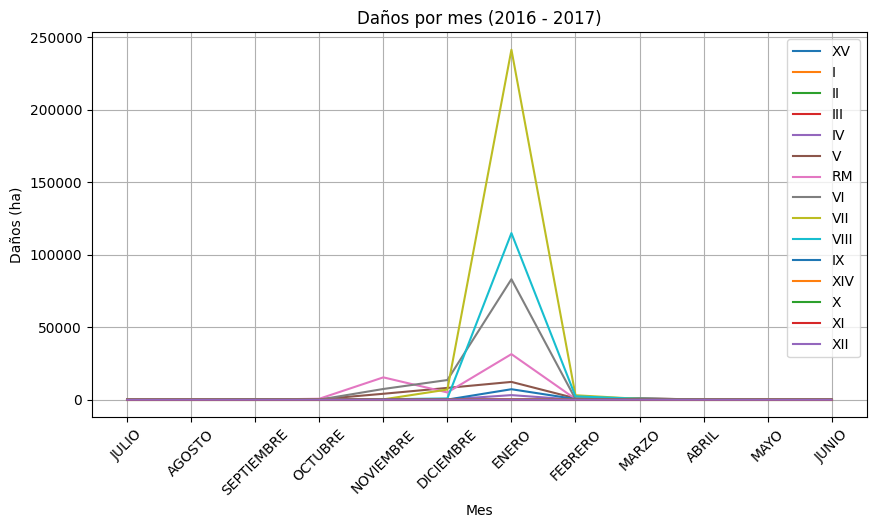

In [10]:
# Graficamos los datos de daños por mes
regiones = df_danos_mes_2016_2017.columns[1:]
plt.figure(figsize=(10, 5))
plt.title("Daños por mes (2016 - 2017)")
plt.xlabel("Mes")
plt.ylabel("Daños (ha)")
for i in range(1, len(df_danos_mes_2016_2017.columns)):
    sns.lineplot(data=df_danos_mes_2016_2017, x="MES", y=df_danos_mes_2016_2017.columns[i], label=df_danos_mes_2016_2017.columns[i])
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()